In [1]:
# 2017 서울시 구별 CCTV 현황


In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

## 과제1 : 서울시 구별 경찰서수와 CCTV설치수 조사


In [3]:
df = pd.read_csv('data/public_seoul_cctv_2017.csv', encoding='euc-kr')
df.tail(10)

,경찰서,개소,대수
22,구로,695,"1,691"
23,서초,344,"1,079"
24,양천,763,"2,234"
25,송파,675,779
26,노원,"1,288","1,416"
27,방배,236,830
28,은평,339,"1,058"
29,도봉,472,485
30,수서,677,"1,856"
31,총계,"16,603","33,523"


In [4]:
# 경찰서 컬럼을 index로 지정
df.set_index('경찰서', inplace = True)
df.head()

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,"1,131"
혜화,215,481


In [5]:
# 총계 행 삭제
df = df.drop(df.index[-1])
df.tail()

,개소,대수
경찰서,,
노원,"1,288","1,416"
방배,236,830
은평,339,"1,058"
도봉,472,485
수서,677,"1,856"


In [9]:
# 문자형 -> 숫자형

for n in np.arange(len(df)):
    df['개소'].values[n] = int(df['개소'].values[n].replace(',',''))
    df['대수'].values[n] = int(df['대수'].values[n].replace(',',''))
    
df.head()

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481


In [10]:
# sorting
df_sort = df.sort_values('대수', ascending  = False)
df_sort.head()

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691


## 과제2 : 시각화


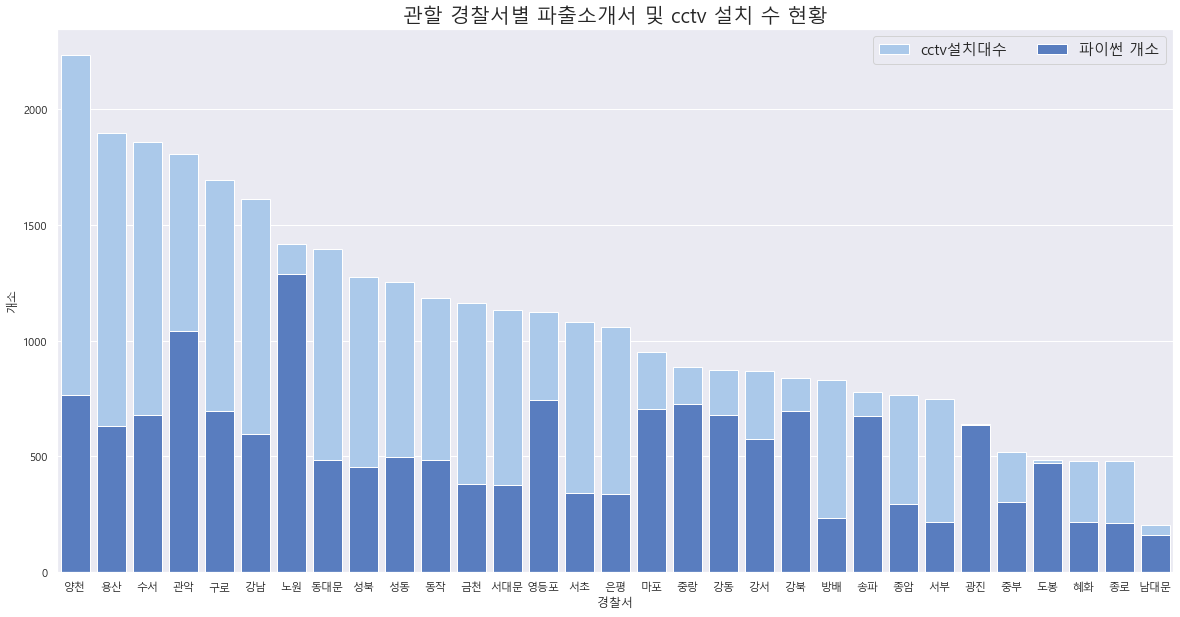

In [13]:
plt.figure(figsize = (20,10))
sns.set_color_codes('pastel')
sns.barplot( x= df_sort.index, y = df_sort['대수'], color = 'b', label = 'cctv설치대수')
sns.set_color_codes('muted')
sns.barplot( x= df_sort.index, y = df_sort['개소'], color = 'b', label = '파이썬 개소')

plt.legend(ncol=2, loc = 1, fontsize = 15, frameon = True)
plt.title('관할 경찰서별 파출소개서 및 cctv 설치 수 현황', fontsize = 20)

plt.show()

- seaborn.barplot stype: x, y 값을 바구면 barch

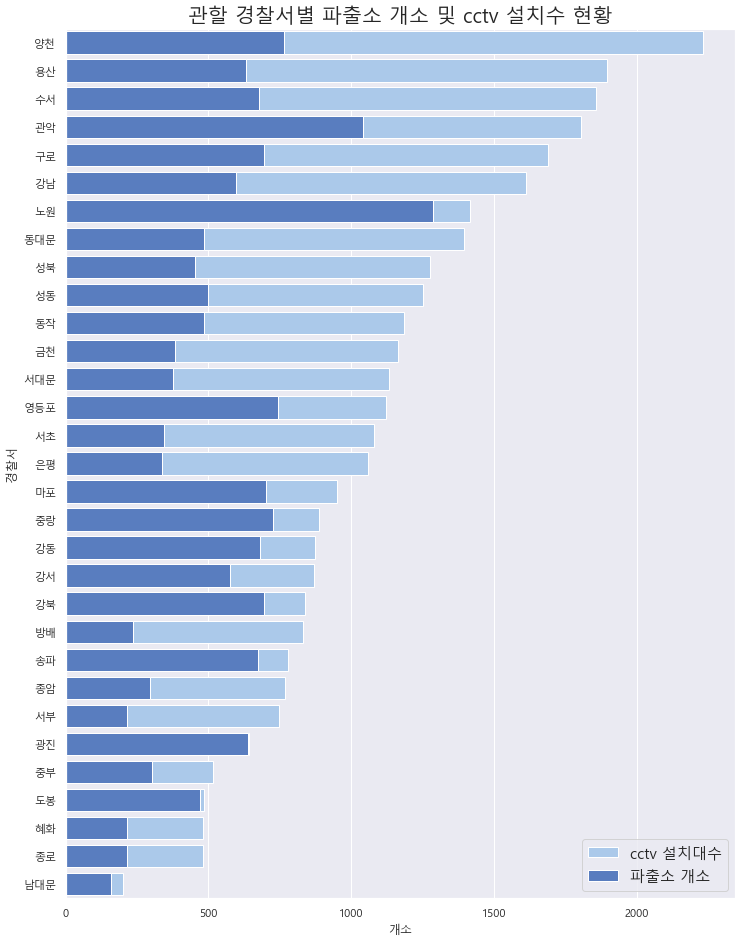

In [17]:
plt.figure(figsize = (12, 16))

sns.set_color_codes('pastel')
sns.barplot(x = df_sort['대수'], y = df_sort.index, color = 'b', label = 'cctv 설치대수')
sns.set_color_codes('muted')

sns.barplot(x = df_sort['개소'], y = df_sort.index, color = 'b', label = '파출소 개소')

plt.legend(ncol = 1, loc = 4, fontsize = 15, frameon = True)
plt.title('관할 경찰서별 파출소 개소 및 cctv 설치수 현황', fontsize = 20)

plt.show()

In [18]:
df_sort.head()

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691


- pyplot.pie style

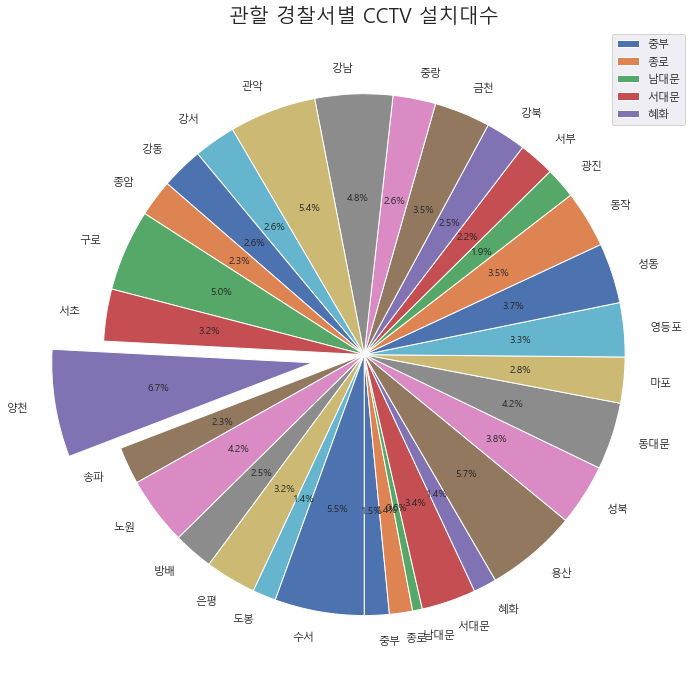

In [23]:
plt.figure(figsize = (12,12))
df_cctv = df['대수']

# explode를 만드는 방법
explode = [0.2 if df_cctv[i] == df_cctv.max() else 0 for i in range(len(df_cctv))]

plt.pie(df_cctv, 
        explode = explode,
        labels = df_cctv.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 270
       )
plt.legend(df_cctv.index[:5], loc = 1)
plt.title('관할 경찰서별 CCTV 설치대수', fontsize = 20)

plt.show()



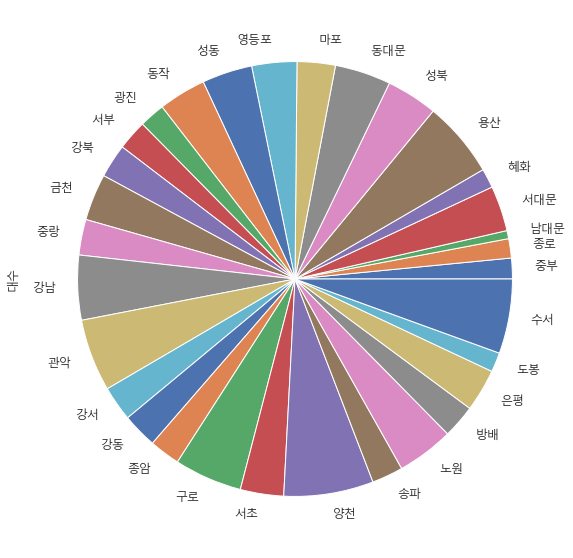

In [25]:
# pandas.plot stype
df['대수'].plot(kind = 'pie', fontsize = 12, figsize = (10,10))

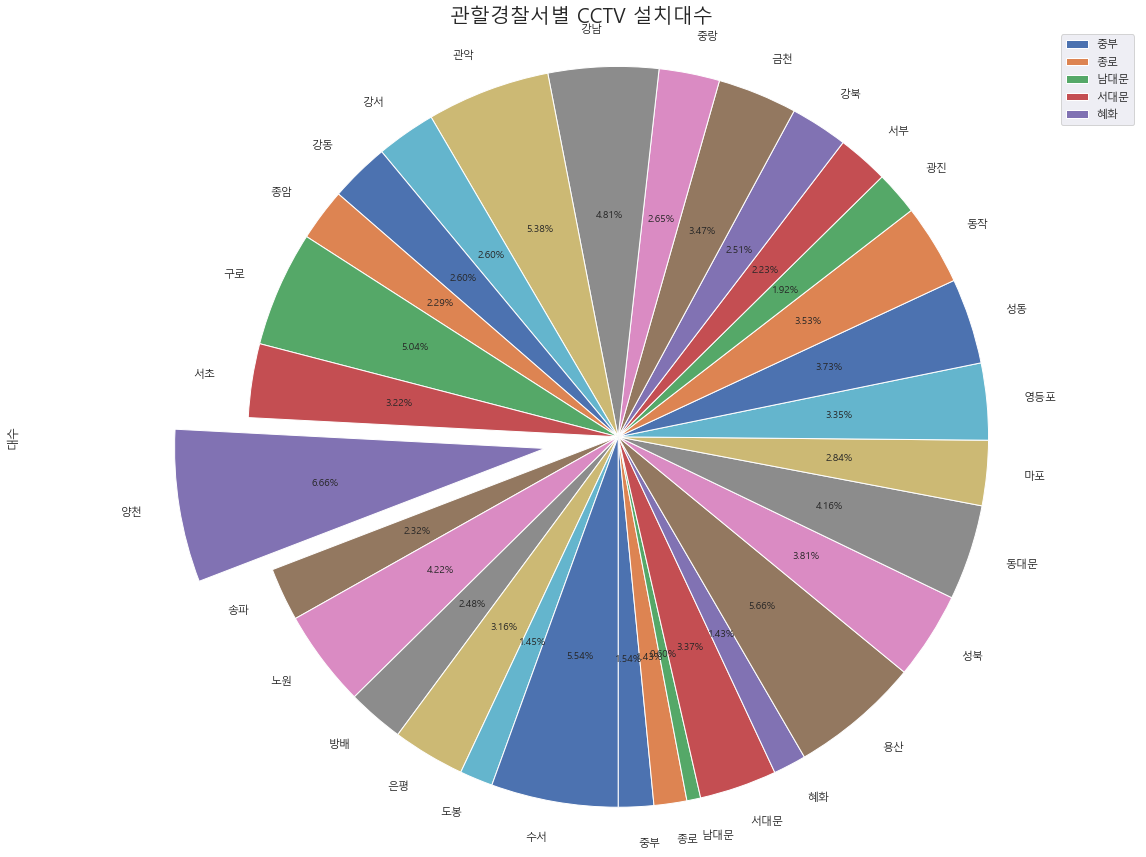

In [29]:
df_cctv = df['대수']
explode = [0.2 if df_cctv[i] == df_cctv.max() else 0 for i in range(len(df_cctv))]

df_cctv.plot(kind = 'pie',
            figsize = (20,15),
            autopct = '%.2f%%',
            shadow = False,
            startangle = -90,
            explode = explode)
plt.axis('equal')
plt.legend(df_cctv.index[:5], loc = 1)
plt.title('관할경찰서별 CCTV 설치대수', fontsize = 20 )

plt.show()

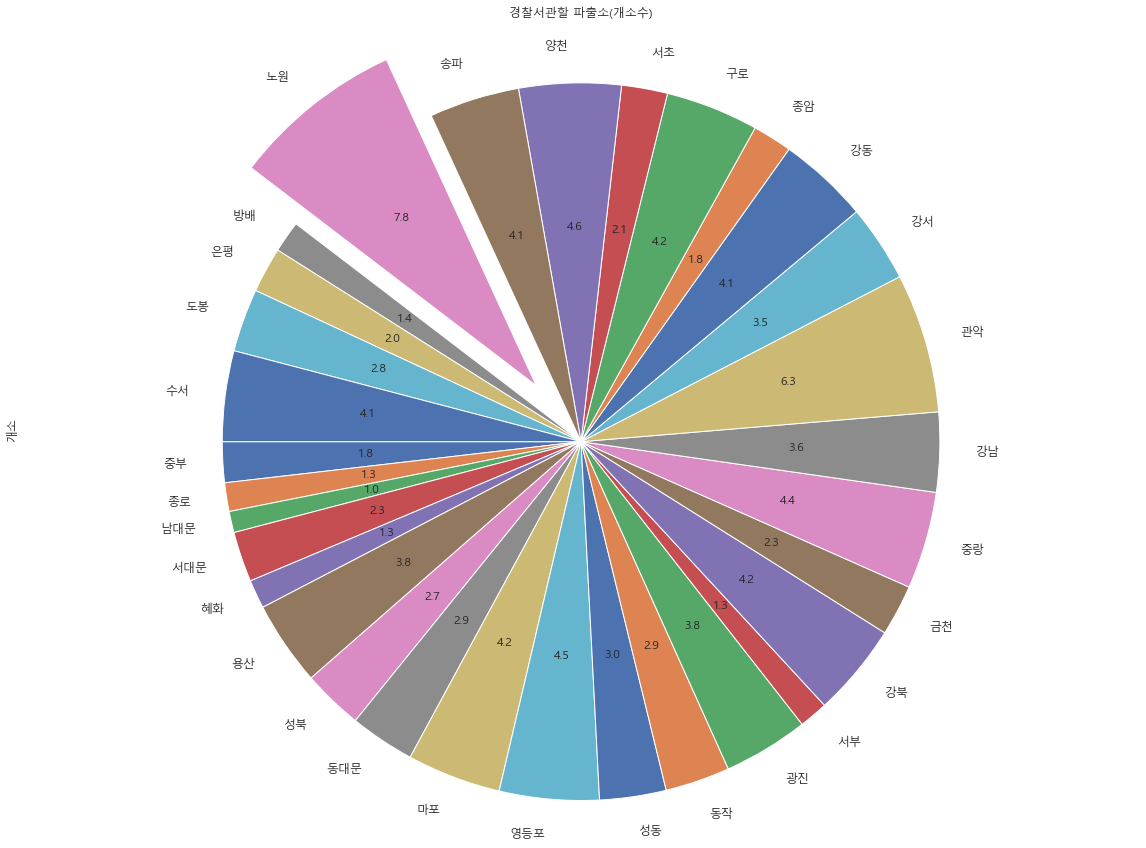

In [31]:
# 파출소 개소수

df_pbox = df['개소']
explode = [0.2 if df_pbox[i] == df_pbox.max() else 0 for i in range(len(df_pbox))]

df_pbox.plot(kind = 'pie',
            title = '경찰서관할 파출소(개소수)',
            figsize = (20,15),
            fontsize = 12,
            autopct = '%1.1f',
            shadow = False,
            startangle = 180,
             explode = explode
            )
plt.axis('equal')
plt.show()

,
## 과제5 : 모든 그래프를 1Page Report로 나타내보자: 함수로 만들기

In [32]:
def draw_barplot(param='v'):
    
    if param == 'h':        
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort['대수'], y = df_sort.index, color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort['개소'], y = df_sort.index, color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=4, frameon=True, fontsize=15)
    
    else:
        sns.set_color_codes("pastel")
        sns.barplot(x = df_sort.index, y = df_sort['대수'], color="b", label='CCTV 설치대수')

        sns.set_color_codes("muted")
        sns.barplot(x = df_sort.index, y = df_sort['개소'], color="b", label='파출소 개소')

        plt.legend(ncol=2, loc=1, frameon=True, fontsize=15)
        
    
    
def draw_pieplot(param):
    if param == 'CCTV':
        df_cctv = df['대수']
        explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

        df_cctv.plot(kind='pie', 
                     title='경찰서관할 CCTV (설치대수)',
                     fontsize=9, 
                     autopct='%.2f%%', 
                     shadow=False, 
                     startangle=-90,
                     explode = explode,
                    )
        # plt.axis('equal')
        # plt.show()
    elif param == 'PBOX':
        df_pbox = df['개소']
        explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

        df_pbox.plot(kind='pie', 
                     title='경찰서관할 파출소 (개소수)',
                     fontsize=12, 
                     autopct='%1.1f', 
                     shadow=False, 
                     startangle=180,
                     explode = explode,
                    )
    else :
        print("Not Operation !!")
        return 
    
    plt.axis('equal')
    # plt.show()
    

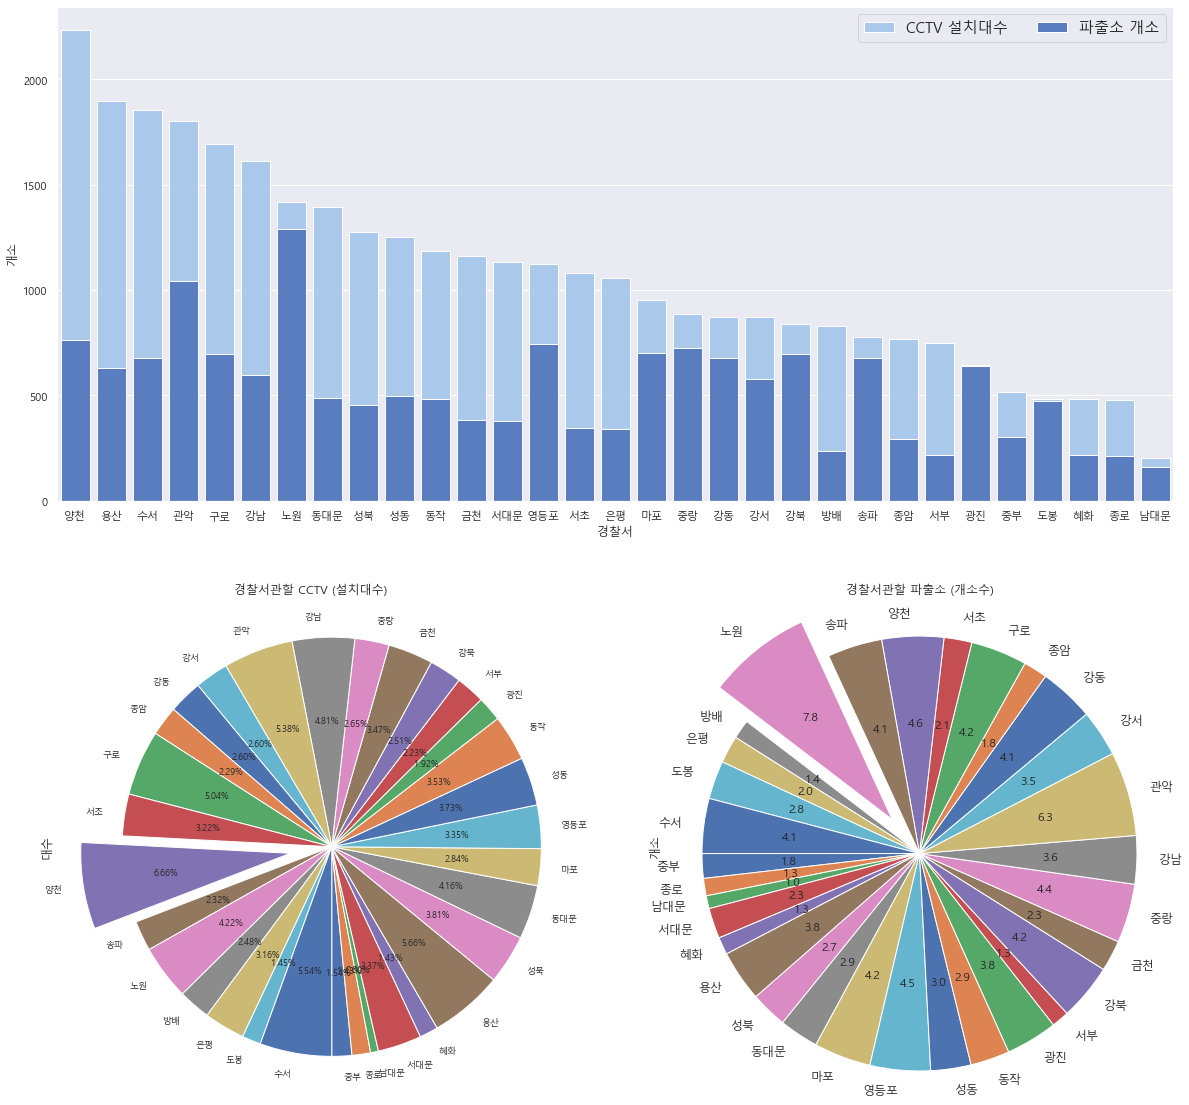

In [33]:
plt.figure(figsize=(20,20))

plt.subplot(211) 
draw_barplot(param='v')

plt.subplot(223) 
draw_pieplot('CCTV')

plt.subplot(224)
draw_pieplot('PBOX')

plt.show()